# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
# Google Colab and drive connection. Uncomment the block to use
'''
import sys
from google.colab import drive
drive.mount('/content/gdrive', True)
sys.path.append('/content/gdrive/My Drive/colab/assignment1')
#'''

#!ls /content/gdrive/My\ Drive/colab/assignment1/*.py
#sys.path

"\nimport sys\nfrom google.colab import drive\ndrive.mount('/content/gdrive', True)\nsys.path.append('/content/gdrive/My Drive/colab/assignment1')\n#"

In [3]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [4]:
train_X, train_y, test_X, test_y = load_svhn("E:\\working/DL-AI\\assignments\\assignment1\\data", max_train=1000, max_test=100)
#train_X, train_y, test_X, test_y = load_svhn("/Users/youzhick/Desktop/DL-AI/assignments/assignment1/data", max_train=1000, max_test=100)



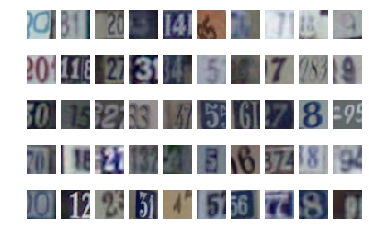

In [5]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [6]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 3*3*32]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [7]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`

In [8]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [10]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [11]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

30.3 ms ± 121 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
21 ms ± 103 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
29.3 ms ± 1.17 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

In [13]:
# TODO: implement binary_classification_metrics in metrics.py
accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 1
Accuracy: 0.53, Precision: 0.50, Recall: 0.57, F1: 0.53


In [14]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.47, Precision: 0.43, Recall: 0.43, F1: 0.43


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение k! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [15]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
# Starting from 1 because we don'y need the first empty array
splits = np.arange(0, binary_train_X.shape[0], int(binary_train_X.shape[0]/num_folds))[1:]

# Fuck the direct split. We'll slpit the indices for faster operation
folds = np.array(np.split(np.arange(0, binary_train_X.shape[0]), splits))

k_choices = np.array([1, 2, 3, 5, 8, 10, 15, 20, 25, 50])
k_to_f1 = np.zeros(k_choices.shape)

for ki in range(k_choices.shape[0]):
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1
    
    knn_cl_k = KNN(k=k_choices[ki])
    
    for fi in range(num_folds):
        trn_inds = np.concatenate([folds[i] for i in range(folds.shape[0]) if i != fi])
        knn_cl_k.fit(binary_train_X[trn_inds], binary_train_y[trn_inds])
        prediction = knn_cl_k.predict(binary_train_X[folds[fi]])
        accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_train_y[folds[fi]])
        
        k_to_f1[ki] += f1

    k_to_f1[ki] /= num_folds
    print('k = %d, f1 = %f' % (k_choices[ki], k_to_f1[ki]))
    

k = 1, f1 = 0.540495
k = 2, f1 = 0.370366
k = 3, f1 = 0.501370
k = 5, f1 = 0.542485
k = 8, f1 = 0.436177
k = 10, f1 = 0.428195
k = 15, f1 = 0.524249
k = 20, f1 = 0.430762
k = 25, f1 = 0.525333
k = 50, f1 = 0.438791


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [16]:
# TODO Set the best k to the best value found by cross-validation
best_k = k_choices[np.argsort(k_to_f1)][-1]

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 5
Accuracy: 0.53, Precision: 0.50, Recall: 0.71, F1: 0.59


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [17]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [18]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [19]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.27


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [20]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
splits = np.arange(0, train_X.shape[0], int(train_X.shape[0]/num_folds))[1:]

# Fuck the direct split. We'll slpit the indices for faster operstion
folds = np.array(np.split(np.arange(0, train_X.shape[0]), splits))

k_choices = np.array([1, 2, 3, 5, 8, 10, 15, 20, 25, 50])
k_to_accuracy = np.zeros(k_choices.shape)

for ki in range(k_choices.shape[0]):
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    knn_cl_k = KNN(k=k_choices[ki])
    
    for fi in range(num_folds):
        trn_inds = np.concatenate([folds[i] for i in range(folds.shape[0]) if i != fi])
        knn_cl_k.fit(train_X[trn_inds], train_y[trn_inds])
        prediction = knn_cl_k.predict(train_X[folds[fi]])
        k_to_accuracy[ki] += multiclass_accuracy(prediction, train_y[folds[fi]])

    k_to_accuracy[ki] /= num_folds
    print('k = %d, accuracy = %f' % (k_choices[ki], k_to_accuracy[ki]))


k = 1, accuracy = 0.240000
k = 2, accuracy = 0.223000
k = 3, accuracy = 0.221000
k = 5, accuracy = 0.218000
k = 8, accuracy = 0.213000
k = 10, accuracy = 0.228000
k = 15, accuracy = 0.222000
k = 20, accuracy = 0.224000
k = 25, accuracy = 0.218000
k = 50, accuracy = 0.214000


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [21]:
# TODO Set the best k as a best from computed
best_k = k_choices[np.argsort(k_to_accuracy)][-1]
print('For k = %d' % best_k)

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

For k = 1
Accuracy: 0.27
